In [2]:
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms as transforms
import json
import os
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data       import Dataset, DataLoader, SubsetRandomSampler, random_split
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from copy import deepcopy
from mealpy import FloatVar, CDO, AVOA, Problem

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
device

device(type='cuda')

In [1]:
!pip install mealpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 92.4 MB/s eta 0:00:00:00:010:01


In [5]:
import pandas as pd
from tqdm import tqdm
def merge_csv_chunks(filenames, limit=25):
  """
  Merges CSV files in chunks, frees memory after each chunk, and returns only data from the first 'limit' CSVs.

  Args:
      filenames (list): List of CSV filenames.
      chunksize (int, optional): Number of rows to read in each chunk. Defaults to 10000.
      limit (int, optional): Number of CSVs to process and include in the merged data. Defaults to 150.

  Returns:
      pandas.DataFrame: The merged DataFrame containing data from the first 'limit' CSVs.
  """

  merged_data = pd.DataFrame()  # Initialize empty DataFrame


  for filename in tqdm(filenames[:limit]):  # Limit filenames to process

    # Read the current CSV file in chunks
      data = pd.read_csv(filename)
      # Append chunk to merged_data
      merged_data = pd.concat([merged_data, data], ignore_index=True)
      print(f"File processed {filename}")
      # Free memory used by the chunk (might require garbage collection)
      del data

    
      

  return merged_data

In [7]:
%cd ../

/


In [8]:
import glob

# Define the directory path (replace with your actual directory)
directory_path = "./kaggle/input"

# Use glob.glob to get all filenames with the .csv extension
csv_filenames = glob.glob(f"{directory_path}/*.csv")

df  = merge_csv_chunks(csv_filenames)

  4%|▍         | 1/25 [00:02<00:49,  2.04s/it]

File processed ./kaggle/input/part-00128-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


  8%|▊         | 2/25 [00:04<00:49,  2.16s/it]

File processed ./kaggle/input/part-00089-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 12%|█▏        | 3/25 [00:06<00:47,  2.15s/it]

File processed ./kaggle/input/part-00034-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 16%|█▌        | 4/25 [00:08<00:44,  2.12s/it]

File processed ./kaggle/input/part-00042-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 20%|██        | 5/25 [00:10<00:42,  2.10s/it]

File processed ./kaggle/input/part-00160-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 24%|██▍       | 6/25 [00:12<00:41,  2.18s/it]

File processed ./kaggle/input/part-00096-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 28%|██▊       | 7/25 [00:15<00:39,  2.19s/it]

File processed ./kaggle/input/part-00110-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 32%|███▏      | 8/25 [00:18<00:46,  2.71s/it]

File processed ./kaggle/input/part-00078-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 36%|███▌      | 9/25 [00:23<00:50,  3.15s/it]

File processed ./kaggle/input/part-00113-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 40%|████      | 10/25 [00:25<00:44,  2.97s/it]

File processed ./kaggle/input/part-00091-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 44%|████▍     | 11/25 [00:27<00:39,  2.79s/it]

File processed ./kaggle/input/part-00058-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 48%|████▊     | 12/25 [00:30<00:34,  2.67s/it]

File processed ./kaggle/input/part-00105-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 52%|█████▏    | 13/25 [00:32<00:30,  2.58s/it]

File processed ./kaggle/input/part-00161-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 56%|█████▌    | 14/25 [00:37<00:33,  3.09s/it]

File processed ./kaggle/input/part-00077-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 60%|██████    | 15/25 [00:39<00:29,  2.90s/it]

File processed ./kaggle/input/part-00026-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 64%|██████▍   | 16/25 [00:42<00:25,  2.79s/it]

File processed ./kaggle/input/part-00065-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 68%|██████▊   | 17/25 [00:46<00:26,  3.27s/it]

File processed ./kaggle/input/part-00041-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 72%|███████▏  | 18/25 [00:49<00:21,  3.14s/it]

File processed ./kaggle/input/part-00093-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 76%|███████▌  | 19/25 [00:51<00:18,  3.01s/it]

File processed ./kaggle/input/part-00016-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 80%|████████  | 20/25 [00:54<00:14,  2.97s/it]

File processed ./kaggle/input/part-00013-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 84%|████████▍ | 21/25 [00:57<00:11,  2.87s/it]

File processed ./kaggle/input/part-00092-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 88%|████████▊ | 22/25 [01:00<00:08,  2.92s/it]

File processed ./kaggle/input/part-00156-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 92%|█████████▏| 23/25 [01:03<00:06,  3.02s/it]

File processed ./kaggle/input/part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


 96%|█████████▌| 24/25 [01:06<00:02,  2.95s/it]

File processed ./kaggle/input/part-00019-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


100%|██████████| 25/25 [01:11<00:00,  2.84s/it]

File processed ./kaggle/input/part-00153-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


In [9]:
#creating a dictionary of attack types for 33 attack classes + 1 for benign traffic
dict_34_classes = {'BenignTraffic': 0 ,
                    'DDoS-RSTFINFlood' :1, 'DDoS-PSHACK_Flood':2,  'DDoS-SYN_Flood':3, 'DDoS-UDP_Flood':4, 'DDoS-TCP_Flood':5,
                    'DDoS-ICMP_Flood':6, 'DDoS-SynonymousIP_Flood':7, 'DDoS-ACK_Fragmentation':8, 'DDoS-UDP_Fragmentation':9, 'DDoS-ICMP_Fragmentation':10,
                    'DDoS-SlowLoris':11, 'DDoS-HTTP_Flood':12, 'DoS-UDP_Flood':13, 'DoS-SYN_Flood':14, 'DoS-TCP_Flood':15, 'DoS-HTTP_Flood':16,                 # DDoS and DoS
                    'Mirai-greeth_flood': 17, 'Mirai-greip_flood': 18, 'Mirai-udpplain': 19,                                                                    # Mirai
                    'Recon-PingSweep': 20, 'Recon-OSScan': 21, 'Recon-PortScan': 22, 'VulnerabilityScan': 23, 'Recon-HostDiscovery': 24,                        # Reconnaissance
                    'DNS_Spoofing': 25, 'MITM-ArpSpoofing': 26,                                                                                                 # Spoofing
                    'BrowserHijacking': 27, 'Backdoor_Malware': 28, 'XSS': 29, 'Uploading_Attack': 30, 'SqlInjection': 31, 'CommandInjection': 32,              # Web
                    'DictionaryBruteForce': 33}                                                                                                                 # Brute Force

dict_7_classes = {  0: 0 ,
                    1 :1, 2:1,  3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1,                                                    # DDoS and DoS
                    17: 2, 18: 2, 19: 2,                                                                                                                        # Mirai
                    20: 3, 21: 3, 22: 3, 23: 3, 24: 3,                                                                                                          # Reconnaissance
                    25: 4, 26: 4,                                                                                                                               # Spoofing
                    27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 5,                                                                                                   # Web
                    33: 6}                                                                                                                                      # Brute Force

dict_2_classes = {  0: 0 ,
                    1 :1, 2:1,  3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1,                                                    # DDoS and DoS
                    17: 1, 18: 1, 19: 1,                                                                                                                        # Mirai
                    20: 1, 21: 1, 22: 1, 23: 1, 24: 1,                                                                                                          # Reconnaissance
                    25: 1, 26: 1,                                                                                                                               # Spoofing
                    27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1,                                                                                                   # Web
                    33: 1}

In [10]:
#Replacing the labels with binary notaion (0 and 1)

df["label"] = df["label"].replace(dict_34_classes)
df["label"] = df["label"].replace(dict_7_classes)
df['label'] = df['label'].replace(dict_2_classes)


/tmp/ipykernel_34/968194357.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"] = df["label"].replace(dict_34_classes)


In [11]:
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data
        self.features = torch.tensor(data.drop('label', axis=1).values, dtype=torch.float32)
        self.labels = torch.tensor(data['label'].values, dtype=torch.float32)
       

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]
       
        return feature, label

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random
from imblearn.over_sampling import SMOTE
import torch
from torch.utils.data import Dataset, DataLoader, random_split


def prepare_dataset(df, percentages, batch_size: int, test_ratio: float = 0.3, val_ratio: float = 0.1):
    if not np.isclose(sum(percentages), 1.0):
        raise ValueError("Percentages must sum to 1.0")

    # Initial split of the data between 70:30 using stratified split
    train_data, test_data = train_test_split(df, test_size=test_ratio, stratify=df['label'], random_state=42)

    print("Train data shape:", train_data.shape)
    print("Test data shape:", test_data.shape)
    scaler = MinMaxScaler()

    # Option 1: Early Transformation (using MinMaxScaler)
    features = train_data.drop('label', axis=1)
    transformed_train_data = scaler.fit_transform(features)

    print("Shape of transformed_train_data after fitting scaler:", transformed_train_data.shape)

    transformed_features = scaler.transform(features)

    X_train = transformed_features
    Y_train = train_data['label'].values

    # Performing SMOTE for upsampling of benign data
    sm = SMOTE(random_state=42)  # Create SMOTE instance with random seed
    X_train_resampled, y_train_resampled = sm.fit_resample(X_train, Y_train)

    # **Print shapes for potential error check:**
    print("Shape of X_train_resampled (features after SMOTE):", X_train_resampled.shape)
    print("Shape of y_train_resampled (labels after SMOTE):", y_train_resampled.shape)

    # Concatenate features and labels back into a DataFrame
    train_data_resampled = pd.DataFrame(np.concatenate((X_train_resampled, y_train_resampled.reshape(-1, 1)), axis=1),
                                       columns=list(train_data.columns)[:-1] + ['label'])

    trainset = CustomDataset(train_data_resampled)

    test_features = test_data.drop('label', axis=1)
    test_labels = test_data['label'].values
    print("Shape of the labels of test data:", test_labels.shape)
    # **Important change:** Use scaler already fitted on training data
    transformed_test_data = scaler.transform(test_features)

    print("Shape of transformed_test_data:", transformed_test_data.shape)

    test_data_resampled = pd.DataFrame(np.concatenate((transformed_test_data, test_labels.reshape(-1, 1)), axis=1),
                                       columns=list(test_data.columns)[:-1] + ['label'])

    testset = CustomDataset(test_data_resampled)

    print("Length of the trainset before splitting:", len(trainset))

    # Calculate the partition sizes based on the provided percentages
    total_len = len(trainset)
    partition_sizes = [int(total_len * p) for p in percentages]

    # Adjust the last partition size to ensure all data is used
    partition_sizes[-1] = total_len - sum(partition_sizes[:-1])
    print("Partition sizes:", partition_sizes)

    trainsets = random_split(trainset, partition_sizes, torch.Generator().manual_seed(2023))

    trainloaders = []
    valloaders = []

    for trainset in trainsets:
        num_total = len(trainset)
        num_val = int(val_ratio * num_total)
        num_train = num_total - num_val

        for_train, for_val = random_split(
            trainset, [num_train, num_val], torch.Generator().manual_seed(2023)
        )

        trainloaders.append(
            DataLoader(for_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
        )
        valloaders.append(
            DataLoader(for_val, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)
        )

    testloader = DataLoader(testset, batch_size=128)

    return trainloaders, valloaders, testloader

In [13]:
#For non iid datas
percentages = [0.15, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.075, 0.075]
batch_size = 128

trainloaders, valloaders, testloader = prepare_dataset(df, percentages, batch_size)

Train data shape: (4903217, 47)
Test data shape: (2101379, 47)
Shape of transformed_train_data after fitting scaler: (4903217, 46)
Shape of X_train_resampled (features after SMOTE): (9576154, 46)
Shape of y_train_resampled (labels after SMOTE): (9576154,)
Shape of the labels of test data: (2101379,)
Shape of transformed_test_data: (2101379, 46)
Length of the trainset before splitting: 9576154
Partition sizes: [1436423, 957615, 957615, 957615, 957615, 957615, 957615, 957615, 718211, 718215]


In [14]:
#For iid split
percentages = [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]
batch_size = 128

trainloaders, valloaders, testloader = prepare_dataset(df, percentages, batch_size)


Train data shape: (4903217, 47)
Test data shape: (2101379, 47)
Shape of transformed_train_data after fitting scaler: (4903217, 46)
Shape of X_train_resampled (features after SMOTE): (9576154, 46)
Shape of y_train_resampled (labels after SMOTE): (9576154,)
Shape of the labels of test data: (2101379,)
Shape of transformed_test_data: (2101379, 46)
Length of the trainset before splitting: 9576154
Partition sizes: [957615, 957615, 957615, 957615, 957615, 957615, 957615, 957615, 957615, 957619]


In [14]:
class Net(nn.Module):

  def __init__(self):
    super(Net,self).__init__()

    self.encoder = nn.Sequential(
        nn.Linear(46,64),
        nn.BatchNorm1d(64),
        nn.LeakyReLU(),
        nn.Linear(64, 32),
        nn.BatchNorm1d(32),  # BatchNorm1d after the second linear layer
        nn.LeakyReLU(),
        nn.Linear(32, 16),
        nn.BatchNorm1d(16),  # BatchNorm1d after the third linear layer
        nn.LeakyReLU(),
        nn.Linear(16,1),
        nn.Sigmoid()
    )

  def forward(self,x):
      output = self.encoder(x)
      return output

In [15]:
#Client side training
def train(model,train_data,local_epoch,lr,momentum,weight_decay):
    # Track training history
    train_loss = []
    
    criterion = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
    
    # Initialize early stopping variables
    best_val_loss = float('inf')  # Set initial best validation loss to positive infinity

    # Loop through epochs
    for epoch in range(int(local_epoch)):
        #print(f"Epoch: {epoch+1}/{local_epoch}")
        
        # Training phase
        model.train()
        train_epoch_loss = 0
        for feature, labels in train_data:
            # Move data and target to device (if using GPU)
            feature = feature.to(device)
            labels = labels.to(device)

            # Clear gradients
            optimizer.zero_grad()

            # Forward pass
            output = model(feature)

            labels = labels.view(-1, 1)

            # Calculate loss
            loss = criterion(output, labels)
        
            loss.backward()

            optimizer.step()

            # Track batch loss
            train_epoch_loss += loss.item()

        # Calculate average training loss for epoch
        avg_train_loss = train_epoch_loss / len(train_data)
        train_loss.append(avg_train_loss)
        #print(f"\tTraining Loss: {avg_train_loss:.4f}")

    total_loss = sum(train_loss) / len(train_loss)

    return model,model.state_dict(),total_loss

In [16]:
def validate(model,val_loader):
    
    total_loss = 0.0
    model.eval()
    criterion = nn.BCELoss()
    total_samples = len(val_loader.dataset)
    with torch.no_grad():
        
        for feature, labels in val_loader:
            # Move data and target to device (if using GPU)
            feature = feature.to(device)
            labels = labels.to(device)
            
            output = model(feature)

            labels = labels.view(-1, 1)

            # Calculate loss
            loss = criterion(output, labels)
            
            total_loss += loss.item() * feature.size(0)
        
    
    avg_loss = total_loss / total_samples
         
            
    return avg_loss
        

In [21]:
import copy
def objective_function(hyperparameters,model,ds):
    
    lr, momentum , weight_decay = hyperparameters
    print(f"lr={lr}, weight_decay={weight_decay}, momentum={momentum}, local_epoch={1}")
    model_copy =  copy.deepcopy(model)
    model, weights, loss = train(model_copy,ds,1,lr,momentum,weight_decay) #Here 1 signifies that HPO tuning , the model will run for 1 oepoch to test for that hyperparameter
    
    return loss
    

In [18]:
def save_to_csv(train_loss,val_loss,curr_round):
    
    results_dir = '/kaggle/working/results'
    os.makedirs(results_dir, exist_ok=True)
    
    data = {'Iteration': curr_round,
            'Server_train_loss': train_loss,
            'Server_val_loss': val_loss}

    server_df = pd.DataFrame(data)
    server_df.to_csv(os.path.join(results_dir, 'server_metrics.csv'))

In [22]:
import copy
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution as DE
import time

def training(model, rounds, training_sets, validation_sets,testing_sets,C, K, patience=10):
    """
    Function implements the Federated Averaging Algorithm from the FedAvg paper.
    Specifically, this function is used for the server side training and weight update.

    Params:
        - model:           PyTorch model to train
        - rounds:          Number of communication rounds for the client update
        - training_sets:   List of training datasets for each client
        - testing_sets:    List of testing datasets for each client
        - validation_sets: List of validation datasets for each client
        - C:               Fraction of clients randomly chosen to perform computation on each round
        - K:               Total number of clients
        - patience:        Number of rounds to wait before early stopping if validation loss doesn't improve

    Returns:
        - model:           Trained model on the server
    """
    
    # global model weights
    global_weights = model.state_dict()

    # training loss

    best_val_loss = float('inf')
    rounds_without_improvement = 0
    # measure time
    start = time.time()
    
    train_loss = []
    val_loss = []
    
    for curr_round in range(1, rounds + 1):
        print(f"Round {curr_round}/{rounds}")
        w, local_loss,val_local, train_loader_array, val_loader_array = [], [], [], [], []

        m = max(int(C * K), 1)
        print(f"Number of selected clients: {m}")
        
        S_t = np.random.choice(range(K), m, replace=False)
        print(f"Selected clients: {S_t}")
        
        for k in S_t:
            print(f"Training client {k}")
            problem = {
                "obj_func": lambda hyperparams: objective_function(hyperparams, model, training_sets[k]),
                "bounds": FloatVar(lb=(0.001, 0.1, 0.001), ub=(0.1, 0.9, 0.1), name="delta"),
                "minmax": "min",
                "log_to": None,
            }
            
            term_dict = {  # When creating this object, it will override the default epoch you define in your model
                "max_time": 30# 1000 epochs
            }
            
            optimizer = CDO.OriginalCDO(epochs=1,pop_size=10)  # Example using Differential Evolution
            result = optimizer.solve(problem = problem,termination = term_dict)
            lr, momentum, weight_decay = result.solution[0] , result.solution[1] , result.solution[2]
            print(f"Best hyperparameters for client {k}: lr={lr}, momentum={momentum}, weight_decay={weight_decay}")
            
            model_copy = copy.deepcopy(model)
            model_train,weights, loss = train(model_copy, training_sets[k],5, lr, momentum, weight_decay) #After getting the hyperparameter from HPO the model will run for 5 epochs
            loss_val = validate(model_train, validation_sets[k])
            w.append(copy.deepcopy(weights))
            print(f"Client {k} training loss: {loss}")
            print(f"Client {k} validation loss: {loss_val}")
            train_loader_array.append(training_sets[k])
            val_loader_array.append(validation_sets[k])
            local_loss.append(loss)
            val_local.append(loss_val)
            
        weights_avg = copy.deepcopy(w[0])
        for k in weights_avg.keys():
            for i in range(1, len(w)):
                weights_avg[k] += w[i][k]
            weights_avg[k] = torch.div(weights_avg[k], len(w))
        
        global_weights = weights_avg
        model.load_state_dict(global_weights)
        
        #for i in range(len(train_loader_array)):
           # local_loss.append(validate(model,train_loader_array[i])) #Running the updated model on client side (training data)
            #val_local.append(validate(model,val_loader_array[i])) #Running the updated model on client side (validation data)
    
        
        loss_avg = sum(local_loss) / len(local_loss)
        print(f'Round {curr_round}... \t training Average Loss: {round(loss_avg, 3)}')
        val_avg = sum(val_local) / len(val_local)
        print(f'Round {curr_round}... \t validation Average Loss: {round(val_avg, 3)}')
        train_loss.append(loss_avg)
        val_loss.append(val_avg)
        
        save_to_csv(train_loss=train_loss,val_loss=val_loss,curr_round=curr_round)
        
        # Early stopping condition
        if val_avg < best_val_loss:
            best_val_loss = val_avg
            rounds_without_improvement = 0
        else:
            rounds_without_improvement += 1
        
        if rounds_without_improvement >= patience:
            print(f"Validation loss hasn't improved for {patience} rounds. Stopping training.")
            break
    
    results_dir = './kaggle/working/results'
    torch.save(model.state_dict(), os.path.join(results_dir, 'global_model.pth'))
    end = time.time()
    fig, ax = plt.subplots()
    x_axis = np.arange(1, len(train_loss) + 1)
    y_axis_train = np.array(train_loss)
    y_axis_val = np.array(val_loss)
    ax.plot(x_axis, y_axis_train, 'tab:blue', label='Training Loss')
    ax.plot(x_axis, y_axis_val, 'tab:orange', label='Validation Loss')
  
    ax.set(xlabel='Number of Rounds', ylabel='Loss', title='Federated Training Loss Over Rounds')
    ax.grid()
    ax.legend()
    fig.savefig('federated_training_loss.jpg', format='jpg')
    plt.show()
    print("Training Done!")
    print("Total time taken to Train: {} seconds".format(end - start))
    
    return model


In [ ]:
model = training(Net().to(device),50,trainloaders, valloaders, testloader,0.2,10)

Round 1/50
Number of selected clients: 2
Selected clients: [8 3]
Training client 8
lr=0.038357776416170004, weight_decay=0.06519803452038703, momentum=0.11241237223391032, local_epoch=1
lr=0.04770778356347529, weight_decay=0.05363538341337494, momentum=0.7847965422044826, local_epoch=1
lr=0.07879933075714297, weight_decay=0.05177304241914594, momentum=0.47550304957833134, local_epoch=1
lr=0.01748898441444962, weight_decay=0.043373801571385616, momentum=0.8890363998592001, local_epoch=1
lr=0.03558481051024961, weight_decay=0.07986494977520227, momentum=0.6811167398558436, local_epoch=1
lr=0.0375368958953063, weight_decay=0.061276414854741584, momentum=0.3635771813620683, local_epoch=1
lr=0.05265684953989432, weight_decay=0.011823497292903443, momentum=0.8417019577278264, local_epoch=1
lr=0.08400218077560634, weight_decay=0.08269649654648521, momentum=0.20904743512799842, local_epoch=1
lr=0.09969887067584234, weight_decay=0.0792683862377868, momentum=0.7972858175551957, local_epoch=1
lr=

In [25]:
%cd ../


/


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


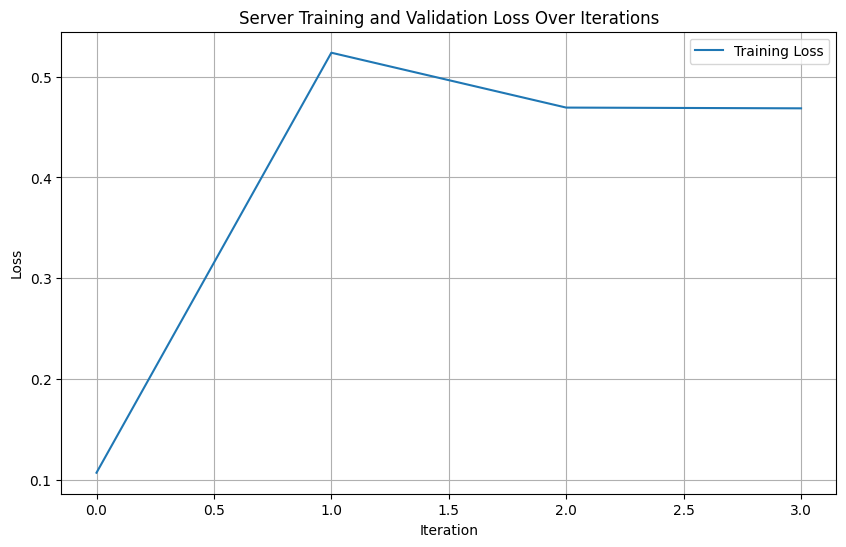

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('./kaggle/working/results/server_metrics.csv')

# Create the plot
plt.figure(figsize=(10, 6))

sns.lineplot(data=df, x=df.index, y='Server_train_loss', label='Training Loss')
#sns.lineplot(data=df, x=df.index, y='Server_val_loss', label='Validation Loss')

# Adding titles and labels
plt.title('Server Training and Validation Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [23]:
print(valloaders[6])

In [30]:
import torch
from sklearn.metrics import precision_score, recall_score, f1_score

def get_accuracy(y_true, y_prob):
    assert y_true.ndim == 1 and y_true.size() == y_prob.size()
    y_prob = y_prob > 0.5
    return (y_true == y_prob).sum().item() / y_true.size(0)

def accuracy_dataset(model, dl):
    """Calculates the accuracy, precision, recall, and F1 score of the model on a given dataset.

    Args:
        model (torch.nn.Module): The model to be evaluated.
        dl (torch.utils.data.DataLoader): The data loader containing the dataset.

    Returns:
        tuple: The accuracy, precision, recall, and F1 score of the model.
    """

    total_correct = 0
    total_samples = 0
    all_labels = []
    all_predictions = []

    model.eval()  # Set the model to evaluation mode

    device = next(model.parameters()).device  # Get the device of the model

    with torch.no_grad():
        for data, labels in dl:
            data, labels = data.to(device), labels.to(device)

            # Forward pass through the model
            output = model(data).squeeze()

            # Collect all predictions and true labels
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(output.cpu().numpy())

            # Calculate the batch accuracy using the get_accuracy function
            batch_correct = get_accuracy(labels, output)
            
            total_correct += batch_correct * labels.size(0)
            total_samples += labels.size(0)

    # Convert lists to numpy arrays for metric calculation
    all_labels = torch.tensor(all_labels)
    all_predictions = torch.tensor(all_predictions)
    all_predictions_binary = all_predictions > 0.5

    # Calculate overall accuracy as a percentage
    accuracy = 100 * (total_correct / total_samples)

    # Calculate precision, recall, and F1 score
    precision = precision_score(all_labels, all_predictions_binary, average='binary')
    recall = recall_score(all_labels, all_predictions_binary, average='binary')
    f1 = f1_score(all_labels, all_predictions_binary, average='binary')

    return accuracy, precision, recall, f1

In [31]:
accuracy, precision ,recall  ,f1 = accuracy_dataset(model,testloader)

In [32]:
print(f"accuracy : {accuracy}, precision : {precision} , recall : {recall} ,f1: {f1}")

accuracy : 98.40252519892888, precision : 0.9999717622999953 , recall : 0.9836688786193984 ,f1: 0.9917533264662234


In [ ]:
#training for non iid

